<a href="https://colab.research.google.com/github/2714830587-xh/testgit/blob/master/%E8%87%AA%E5%8A%A8%E5%BE%AE%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **深度学习框架可以自动计算导数**我们首先将梯度附加到想要对其计算偏导数的变量上。然后我们记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

为什么计算二阶导数比一阶导数的开销要更大？

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

在控制流的例子中，我们计算d关于a的导数，如果我们将变量a更改为随机向量或矩阵，会发生什么？

重新设计一个求控制流梯度的例子，运行并分析结果。

使 f(x)=sin(x)f(x)=sin⁡(x) ，绘制 f(x)f(x) 和 df(x)dxdf(x)dx 的图像，其中后者不使用 f′(x)=cos(x)f′(x)=cos⁡(x) 。

In [61]:
# Question2:

# import torch
# x = torch.arange(40.,requires_grad=True)
# y = 2 * torch.dot(x**2,torch.ones_like(x))
# y.backward()
# x.grad
# y.backward() <======== If run backward the second time we will have run time error as below
# RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling .backward() or autograd.grad() the first time.

# If we use y.backward(retain_graph=True) then we can run y.backward() again as it will do one more time the computation graph

# Question3:

# def f(a):
# b = a * 2
# while b.norm() < 1000:
# print("\n",b.norm())
# b = b * 2
# if b.sum() > 0:
# c = b
# print(“C==b\n”,c)
# else:
# c = 100 * b
# print(“c=100b\n”,c)
# return c

# a = torch.randn(size=(3,1), requires_grad=True)
# print(a.shape)
# print(a)
# d = f(a)
# d.backward() #<====== run time error if a is vector or matrix RuntimeError: grad can be implicitly created only for scalar outputs
# d.sum().backward() #<===== this way it will work
# print(d)

In [62]:
#Q3,Q4
import torch
import math
def f(a):
    b = a * 2+abs(a)
    c=b+a**2
    return c
a = torch.randn(size=(1,3), requires_grad=True)
d = f(a)
d.sum().backward()
a.grad == d / a



tensor([[False, False, False]])

<class 'torch.Tensor'>


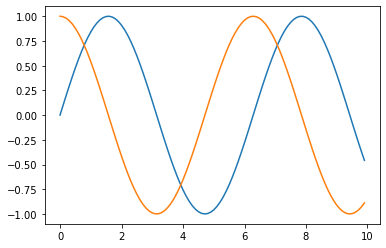

In [63]:
import math
import numpy
import matplotlib.pyplot as plt
x=torch.arange(0.,10.,0.1)
x.requires_grad_(True)
y=torch.sin(x)
y.sum().backward()
#x,y,x_grad,都是tensor而在matplotlib上需要转化为numpy
#无法在需要 grad 的张量上调用 numpy()。改用 tensor.detach().numpy()
print(type(x.grad))

x1=x.detach().numpy()
y1=y.detach().numpy()
x_grad_np=x.grad.detach().numpy()
plt.plot(x1,y1)
plt.plot(x1,x_grad_np)

<class 'torch.Tensor'>


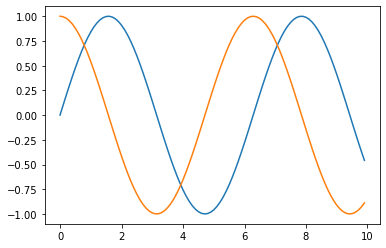

In [64]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
x = torch.arange(0,10,0.1)
x.requires_grad_(True)
x1 = x.detach()
print(type(x1))
y1 = torch.sin(x1)
y2 = torch.sin(x)
y2.sum().backward()
plt.plot(x1,y1)
plt.plot(x1,x.grad)

tensor([0.2500, 0.2500, 0.2500, 0.2500])
Help on function sample in module torch.distributions.multinomial:

sample(self, sample_shape=torch.Size([]))
    Generates a sample_shape shaped sample or sample_shape shaped batch of
    samples if the distribution parameters are batched.

tensor([[2., 1., 7., 0.],
        [2., 3., 2., 3.],
        [4., 3., 2., 1.],
        ...,
        [2., 3., 2., 3.],
        [2., 4., 2., 2.],
        [1., 3., 4., 2.]])
torch.Size([1000, 4])
torch.Size([1000, 1])
tensor([[0.2000, 0.1000, 0.7000, 0.0000],
        [0.2000, 0.2000, 0.4500, 0.1500],
        [0.2667, 0.2333, 0.3667, 0.1333],
        ...,
        [0.2561, 0.2496, 0.2482, 0.2461],
        [0.2561, 0.2497, 0.2481, 0.2460],
        [0.2559, 0.2498, 0.2483, 0.2460]])


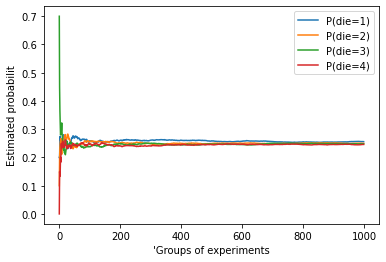

In [65]:
#参考 https://www.cnblogs.com/yangshusen/articles/15685959.html
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt
fair_probs=torch.ones(4)/4
print(fair_probs)
m=multinomial.Multinomial(100,fair_probs).sample()
help(multinomial.Multinomial.sample)
# print(m.sum(dim=0,keepdim=True))
m.shape
counts = multinomial.Multinomial(10,fair_probs).sample((1000,))
print(counts) 
#这里暂且理解为sample需要传入一个可迭代对象，但是目前我们只需要传入一个抽样次数参数，
#抽样次数很明显是一个int，非可迭代对象，因此我们创建一个元组(500,)可迭代对象
# cumsum:讲解 https://blog.csdn.net/songxiaolingbaobao/article/details/114580364
cum_counts = counts.cumsum(dim=0)  # cumsum，作用是计算累加值,dim=0,：行不变，指的是第一行不变，后面的行依次累加
print(cum_counts.shape)
# print(cum_counts.sum(dim=1,keepdims=True))
print(cum_counts.sum(dim=1,keepdims=True).shape)

estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) # 行向量求和  归一化  

print(estimates)
for i in range(4): 
    plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i+1 ) + ")"))
    plt.gca().set_xlabel("'Groups of experiments")
    plt.gca().set_ylabel("Estimated probabilit")
    plt.legend()

In [66]:
a = torch.arange(12).reshape(3,4) 
sum_a0 = a.sum(dim=1,)
sum_a1 = a.sum(dim=1,keepdim=True)
a,sum_a0,sum_a1

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]), tensor([ 6, 22, 38]), tensor([[ 6],
         [22],
         [38]]))

# **用时间说明矢量化为什么如此重要**

In [67]:
import math
import time
import numpy as np
import torch
n = 10000
a = torch.ones(n)
b = torch.ones(n)
class Timer:  
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()
# a=torch.tensor([1,2,3,4])
# a[-1]
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00008 sec'

# **正态分布，也称为高斯分布**

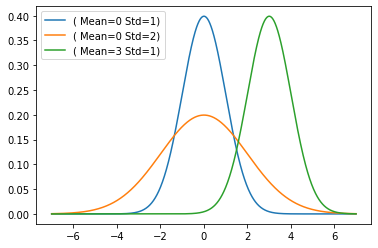

In [68]:
import math
import numpy as np
import matplotlib.pyplot as plt
def normal(x,mu,sigma):
  p=1/(math.sqrt(2*math.pi*sigma**2))
  return p*np.exp(-0.5*(x-mu)**2/sigma**2)
x=np.arange(-7,7,0.01)
params = [(0, 1), (0, 2), (3, 1)]
for mu,sigma in params:
  plt.plot(x,normal(x, mu, sigma),label=("( Mean=" + str(mu) +" Std="+str(sigma)+ ")"))
  plt.legend()

# **线性回归的从零开始实现**

tensor([ 0.2783, -0.8227]) tensor([7.5572])


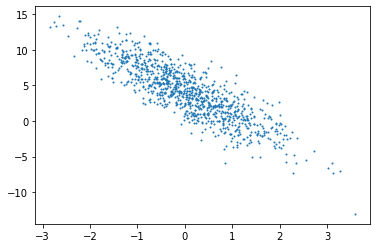

In [69]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

def synthetic_data(w, b, num_examples): 
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print(features[0],labels[0])
plt.scatter(features[:,1],labels,1)

In [70]:

def data_iter(batch_size,features,lables):
  num_exples=len(features)
  indices=list(np.arange(num_exples))
  random.shuffle(indices)
  for i in range(0,num_exples,batch_size):
    batch_indices=torch.tensor(indices[i:min(i+batch_size,num_exples)])
    yield features[batch_indices],lables[batch_indices]

# **我们直观感受一下小批量运算注意yield**
yield 
geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/


In [71]:
batch_size=10
for x,y in data_iter(batch_size,features,labels):
  print(x,"\n",y)
  break

tensor([[-1.2030,  1.1157],
        [-0.2035, -0.1171],
        [-1.7968, -0.7254],
        [-0.4073, -1.8342],
        [-1.2020, -0.5223],
        [-0.8064,  1.1416],
        [-0.2143, -0.6417],
        [ 0.1621,  0.3377],
        [ 0.3496, -1.2044],
        [ 1.4696, -1.2515]]) 
 tensor([[-2.0173],
        [ 4.1883],
        [ 3.0813],
        [ 9.6232],
        [ 3.5786],
        [-1.2993],
        [ 5.9287],
        [ 3.3838],
        [ 9.0004],
        [11.4006]])


In [72]:
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)

# **有点难理解batch_size在这儿**
1)初始化模型参数
2)定义线性回归模型
3)定义损失函数
4)梯度下降
5)超参数
6)模型训练

In [73]:
def linreg(x,w,b):
  return torch.matmul(x,w)+b
def squraed_loss(y_hat,y):
  return (y_hat-y.reshape(y_hat.shape))**2/2
def sgd(params,lr,batch_size):
  # print(params)
  with torch.no_grad():
    for param in params:
      # 有点难理解batch_size在这儿
      # 我们也可以使用 X[:] = X + Y 或 X += Y 来减少操作的内存开销
      # 好像是torch张量的独特性质，在for循环里可以用“+=   -=”
      # 这种运算符直接修改原本的数值。
      # 原地操作
      param-=lr*param.grad/batch_size
      # print(param.shape)
      param.grad.zero_()
      
lr = 0.03
num_epochs = 3
net = linreg
loss = squraed_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.044082
epoch 2, loss 0.000167
epoch 3, loss 0.000048


In [74]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0002, -0.0004], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0011], grad_fn=<RsubBackward1>)


# **线性回归的简洁实现**

In [81]:
import numpy as np
import torch
from torch.utils import data


# 生成数据
true_w=torch.tensor([2,-3.4])
true_b=4.2
fetures,labels=synthetic_data(true_w,true_b,1000)

# 读取数据集
def load_array(data_arrays, batch_size, is_train=True):  
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
# 为了验证是否正常工作，让我们读取并打印第一个小批量样本
# 这里我们使用iter构造Python迭代器，并使用next从迭代器中获取第一项。
print(next(iter(data_iter)))
# print(data_iter)


# 定义模型¶
# nn是神经网络的缩写
from torch import nn
# nn.Linear时指定输入和输出尺寸一样
# 我们将两个参数传递到nn.Linear中。
# 第一个指定输入特征形状，即2，第二个指定输出特征形状，输出特征形状为单个标量，因此为1
net = nn.Sequential(nn.Linear(2, 1)
          
)


# 初始化模型参数
# 我们通过net[0]选择网络中的第一个图层， 然后使用weight.data和bias.data方法访问参数。 
# 我们还可以使用替换方法normal_和fill_来重写参数值
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
print(net[0].weight.data.normal_(0, 0.01))
print(net[0].bias.data.fill_(0))




# 定义损失函数
loss = nn.MSELoss()


# 定义优化算法
trainer = torch.optim.SGD(net.parameters(), lr=0.03)


# 训练
num_epochs = 1000
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')


w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

[tensor([[ 0.5333, -1.2133],
        [-1.3544,  0.7494],
        [ 0.3688,  0.1530],
        [-0.0128, -0.0201],
        [ 0.2188,  1.0635],
        [-0.2884, -2.8344],
        [ 0.8870, -0.4012],
        [-0.1814, -0.9617],
        [ 0.5994, -0.1794],
        [ 1.4695,  0.8700]]), tensor([[9.3056],
        [9.9858],
        [8.7759],
        [5.5045],
        [2.0737],
        [5.1318],
        [3.5244],
        [3.3138],
        [4.1816],
        [3.2486]])]
tensor([[0.0126, 0.0038]])
tensor([0.])
epoch 1, loss 13.780338
epoch 2, loss 13.847914
epoch 3, loss 13.731575
epoch 4, loss 13.729684
epoch 5, loss 13.733209
epoch 6, loss 13.715064
epoch 7, loss 13.781703
epoch 8, loss 13.689602
epoch 9, loss 13.722549
epoch 10, loss 13.787801
epoch 11, loss 13.693222
epoch 12, loss 13.819677
epoch 13, loss 13.760983
epoch 14, loss 13.782066
epoch 15, loss 13.730020
epoch 16, loss 13.675049
epoch 17, loss 13.689074
epoch 18, loss 13.722354
epoch 19, loss 13.895643
epoch 20, loss 13.709999
epoc